# Model Building

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Loading clean data

In [2]:
data = pd.read_csv("./clean_data.csv")
data

,CustGender,CustLocation,Age,CustAccountBalance
0,M,MOHALI,41,48429.49
1,M,AHMEDABAD,45,32274.78
2,M,KOTA,32,282455.64
3,M,AGRA,29,2502.74
4,M,PUNE,32,250.26
...,...,...,...,...
44469,M,THANE,33,218207.57
44470,M,IMPERIA THANE WEST,41,182889.37
44471,F,NEW DELHI,30,15037.89
44472,M,SHILLLONG,35,1002.96


### Feature scaling

In [3]:
### Prepare the training data for model fitting

# Get dummy variables for the categorical values  
df = data.replace(["M", "F"], [1, 0])

# Take only numeric feaetures in order to standard scale them
numeric_features = ['Age', 'CustAccountBalance']

# Scale the features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df

,CustGender,CustLocation,Age,CustAccountBalance
0,1,MOHALI,0.137908,-0.068315
1,1,AHMEDABAD,0.517288,-0.090946
2,1,KOTA,-0.715696,0.259528
3,1,AGRA,-1.000231,-0.132653
4,1,PUNE,-0.715696,-0.135808
...,...,...,...,...
44469,1,THANE,-0.620851,0.169524
44470,1,IMPERIA THANE WEST,0.137908,0.120048
44471,0,NEW DELHI,-0.905386,-0.115093
44472,1,SHILLLONG,-0.431161,-0.134754


In [4]:
X = df[numeric_features + ["CustGender"]]

### KMeans Clustering

Text(0, 0.5, 'Inertia')

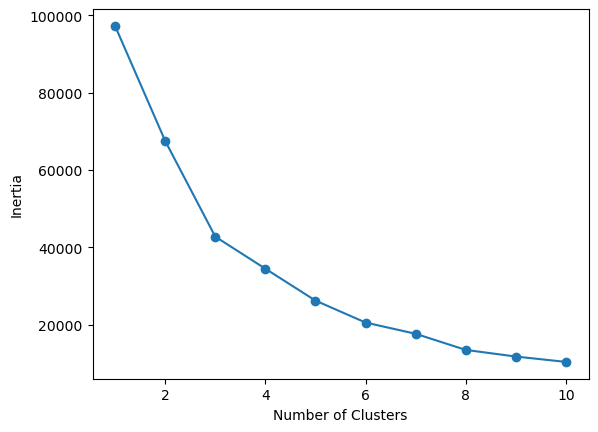

In [5]:
from sklearn.cluster import KMeans

### The optimal number of clusters in KMeans Clustering will be determined using the elbow method

# List containing intertia for each number of clusters
inertia = []

# Loop through number of clusters from 1 - 10 and store info about the inertia for each model
num_clusters = list(range(1, 11))
for i in num_clusters:
    km = KMeans(n_clusters = i, n_init = 3) # Initialize number of clusters
    km.fit(X) # Fit the model
    inertia.append(km.inertia_) # Store inertia info


# Plot the inertia for each number of clusters
plt.plot(num_clusters,inertia)
plt.scatter(num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [6]:
### It is clear that inertia starts to drop off more slowly after only 3 clusters

km = KMeans(n_clusters = 3, n_init = 3) # Initialize the model
km.fit(X) # Fit the model

# Store predicted classes (clusters)
y_pred = km.predict(X)
data["Class"] = y_pred

# Check value counts for each cluster
data["Class"].value_counts()


Class
0    36273
1     8186
2       15
Name: count, dtype: int64

In [7]:
# Get three dataframes (one for each class)
class_0 = data[data["Class"] == 0]
class_1 = data[data["Class"] == 1]
class_2 = data[data["Class"] == 2]

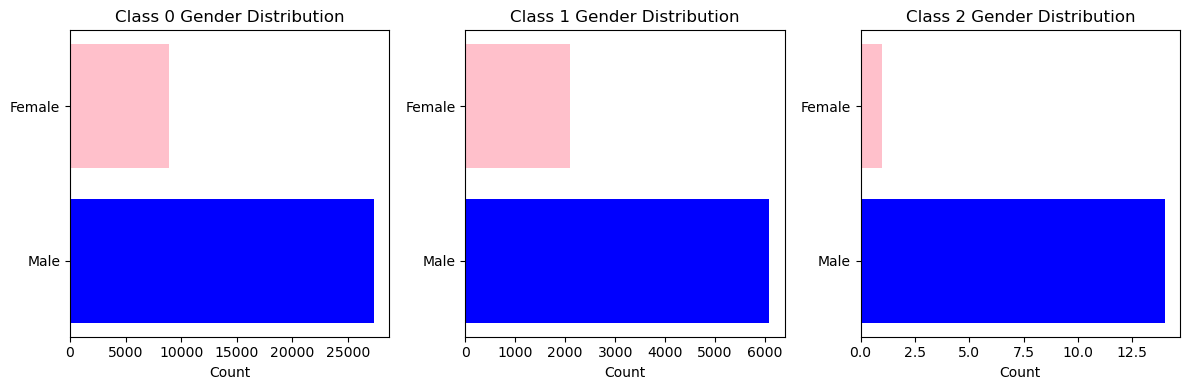

In [8]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns of subplots

# Get value counts for genders of each class
gender_counts0 = class_0['CustGender'].value_counts()
gender_counts1 = class_1['CustGender'].value_counts()
gender_counts2 = class_2['CustGender'].value_counts()

# Plot the first barplot for class_0 on the first subplot
axes[0].barh(gender_counts0.index, gender_counts0.values, color=['blue', 'pink'])
axes[0].set_xlabel('Count')
axes[0].set_yticks(gender_counts0.index, ['Male', 'Female'])
axes[0].set_title('Class 0 Gender Distribution')

# Plot the second barplot for class_1 on the second subplot
axes[1].barh(gender_counts1.index, gender_counts1.values, color=['blue', 'pink'])
axes[1].set_xlabel('Count')
axes[1].set_yticks(gender_counts1.index, ['Male', 'Female'])
axes[1].set_title('Class 1 Gender Distribution')

# Plot the third barplot for class_1 on the second subplot
axes[2].barh(gender_counts2.index, gender_counts2.values, color=['blue', 'pink'])
axes[2].set_xlabel('Count')
axes[2].set_yticks(gender_counts2.index, ['Male', 'Female'])
axes[2].set_title('Class 2 Gender Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

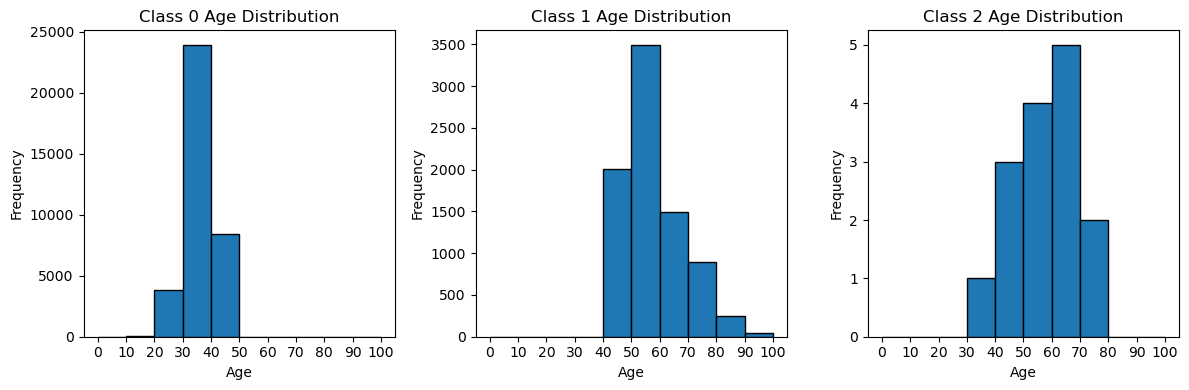

In [9]:
# Define bin edges
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns of subplots

# Plot the first histogram for class_0 on the first subplot
axes[0].hist(data=class_0, x="Age", bins=bin_edges, edgecolor='k')
axes[0].set_xticks(bin_edges)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Class 0 Age Distribution')

# Plot the second histogram for class_1 on the second subplot
axes[1].hist(data=class_1, x="Age", bins=bin_edges, edgecolor='k')
axes[1].set_xticks(bin_edges)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Class 1 Age Distribution')

# Plot the third histogram for class_1 on the second subplot
axes[2].hist(data=class_2, x="Age", bins=bin_edges, edgecolor='k')
axes[2].set_xticks(bin_edges)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Class 2 Age Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# Function that displays data in 2 dimensions and highlights all the different clusters
def display_cluster(classes):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20

    # Create a scatter plot for the age and account balance of a customer
    for i, classi in enumerate(classes):
        if -1 not in classi["Class"].value_counts().index:
            plt.scatter(data = classi, x = "Age", y = "CustAccountBalance", color = color[i], label = "Class " + str(i))

        else:
            plt.scatter(data = classi, x = "Age", y = "CustAccountBalance", color = "k", label = "Noise")
            
    # Label axes and add a title
    plt.xlabel('Age')
    plt.ylabel('Account Balance')
    plt.legend()

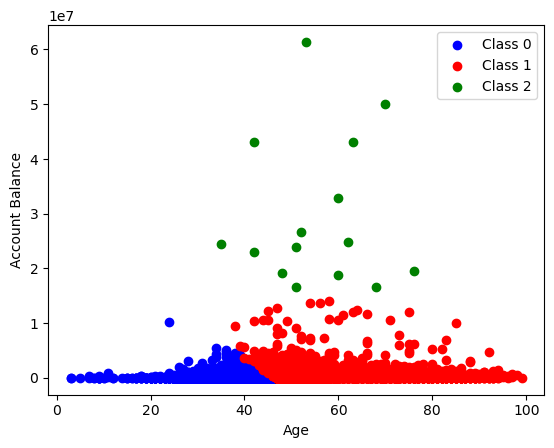

In [11]:
classes = [class_0, class_1, class_2]
display_cluster(classes)

### DBSCAN

In [12]:
# Drop the classes predicted by KMeans
data.drop(columns="Class", axis = 1, inplace = True)

# Calculate the number of samples in the original data
original_sample_size = X.shape[0]

# Perform random downsampling
sampled_indices = np.random.choice(original_sample_size, size = 30000, replace=False)
downsampled_X = X.iloc[sampled_indices]

# Downsampled dataframe
df = data.iloc[sampled_indices]

df

,CustGender,CustLocation,Age,CustAccountBalance
24524,M,SITAPUR,30,79.61
36641,M,NEW DELHI,44,4470.46
9991,F,MANDI GOBINDGARH,40,13578.17
22000,M,NALANDA,37,13862.93
5881,M,KARNAL,49,2372.94
...,...,...,...,...
16711,M,JAIPUR,36,12689.87
38929,M,VISAKHAPATNAM,35,84229.97
29273,F,HYDERABAD,30,99752.05
28679,M,RUDRAPUR,36,44.27


In [13]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.4, min_samples = 4) # Initialize the model
db.fit(downsampled_X) # Fit the model

# Store predicted classes (clusters)
y_pred = db.labels_
y_pred
df["DB1"] = y_pred

# Check value counts for each cluster
df["DB1"].value_counts()

C:\Users\Admir\AppData\Local\Temp\ipykernel_24004\3030735997.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DB1"] = y_pred


DB1
 0    22466
 1     7417
-1      101
 4        5
 2        4
 5        4
 3        3
Name: count, dtype: int64

In [14]:
db = DBSCAN(eps = 0.5, min_samples = 4) # Initialize the model
db.fit(downsampled_X) # Fit the model

# Store predicted classes (clusters)
y_pred = db.labels_
y_pred
df["DB2"] = y_pred

# Check value counts for each cluster
df["DB2"].value_counts()

C:\Users\Admir\AppData\Local\Temp\ipykernel_24004\2635014828.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DB2"] = y_pred


DB2
 0    22478
 1     7434
-1       80
 2        8
Name: count, dtype: int64

In [15]:
db = DBSCAN(eps = 0.6, min_samples = 4) # Initialize the model
db.fit(downsampled_X) # Fit the model

# Store predicted classes (clusters)
y_pred = db.labels_
y_pred
df["Class"] = y_pred

# Check value counts for each cluster
df["Class"].value_counts()

C:\Users\Admir\AppData\Local\Temp\ipykernel_24004\1541649520.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"] = y_pred


Class
 0    22492
 1     7450
-1       58
Name: count, dtype: int64

In [16]:
db = DBSCAN(eps = 0.7, min_samples = 4) # Initialize the model
db.fit(downsampled_X) # Fit the model

# Store predicted classes (clusters)
y_pred = db.labels_
y_pred
df["DB4"] = y_pred

# Check value counts for each cluster
df["DB4"].value_counts()

C:\Users\Admir\AppData\Local\Temp\ipykernel_24004\3452888416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DB4"] = y_pred


DB4
 0    22497
 1     7451
-1       52
Name: count, dtype: int64

In [17]:
### The third model is the only one without very small clusters

# Get three dataframes (one for each class)
class_0 = df[df["Class"] == 0]
class_1 = df[df["Class"] == 1]
noise = df[df["Class"] == -1]

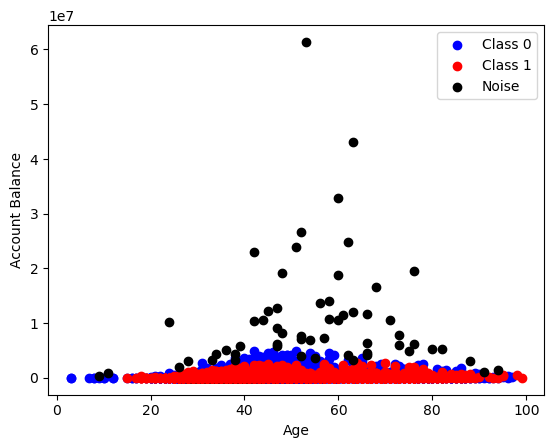

In [18]:
classes = [class_0, class_1, noise]
display_cluster(classes)

### Hierarchical clustering

In [19]:
data

,CustGender,CustLocation,Age,CustAccountBalance
0,M,MOHALI,41,48429.49
1,M,AHMEDABAD,45,32274.78
2,M,KOTA,32,282455.64
3,M,AGRA,29,2502.74
4,M,PUNE,32,250.26
...,...,...,...,...
44469,M,THANE,33,218207.57
44470,M,IMPERIA THANE WEST,41,182889.37
44471,F,NEW DELHI,30,15037.89
44472,M,SHILLLONG,35,1002.96


In [20]:
# Drop the classes predicted by KMeans
#data.drop(columns="Class", axis = 1, inplace = True)

# Calculate the number of samples in the original data
original_sample_size = X.shape[0]

# Perform random downsampling
sampled_indices = np.random.choice(original_sample_size, size = 20000, replace=False)
downsampled_X = X.iloc[sampled_indices]

# Downsampled dataframe
df = data.iloc[sampled_indices]

In [21]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters = 3, linkage = "ward", metric = "euclidean") # Initialize the model
ag = ag.fit(downsampled_X) # Fit the model

# Store predictions
df['Class'] = ag.fit_predict(downsampled_X)
df

C:\Users\Admir\AppData\Local\Temp\ipykernel_24004\2257392501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = ag.fit_predict(downsampled_X)


,CustGender,CustLocation,Age,CustAccountBalance,Class
20435,M,BANGALORE,35,272804.87,1
6384,F,BURDWAN,37,72784.35,1
2517,M,PALGHAR,38,3562.25,1
41064,F,THANE,32,8357.17,1
37529,M,WEST MUMBAI,32,10.01,1
...,...,...,...,...,...
1495,M,FARIDABAD,33,26332.94,1
29044,M,LUCKNOW,39,63541.93,1
3671,F,IMPHAL,36,6552.71,1
28995,M,NEW DELHI,32,28.74,1


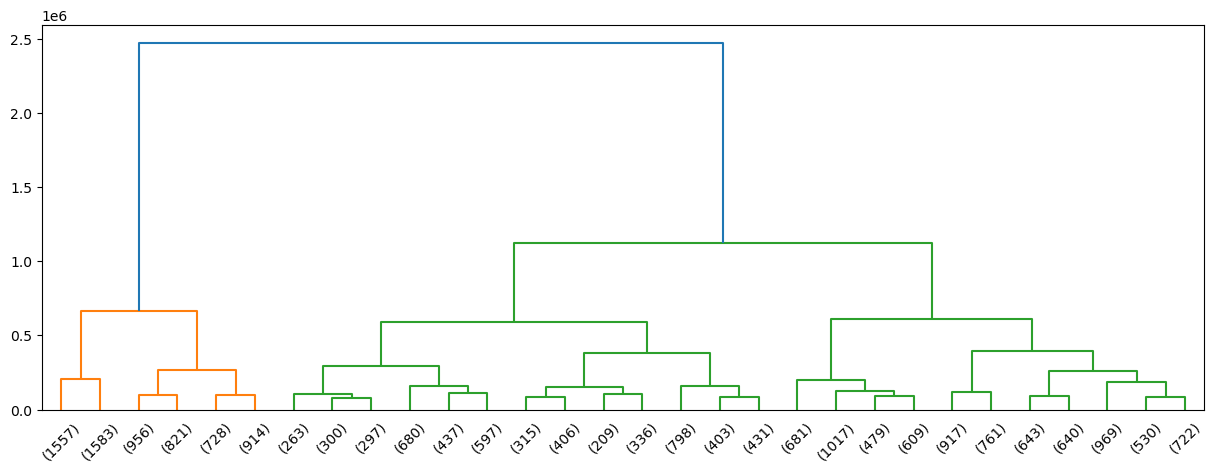

In [22]:
# Plot the hierarchy dendogram
from scipy.cluster import hierarchy
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

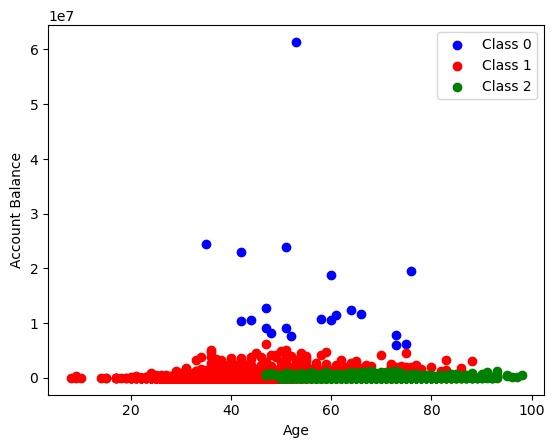

In [23]:
# Get three dataframes (one for each class)
class_0 = df[df["Class"] == 0]
class_1 = df[df["Class"] == 1]
class_2 = df[df["Class"] == 2]

classes = [class_0, class_1, class_2]
display_cluster(classes)

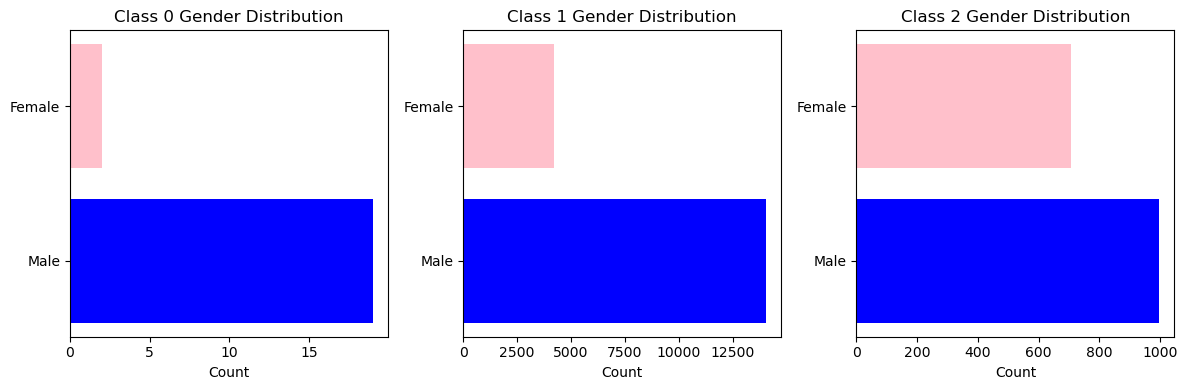

In [24]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns of subplots

# Get value counts for genders of each class
gender_counts0 = class_0['CustGender'].value_counts()
gender_counts1 = class_1['CustGender'].value_counts()
gender_counts2 = class_2['CustGender'].value_counts()

# Plot the first barplot for class_0 on the first subplot
axes[0].barh(gender_counts0.index, gender_counts0.values, color=['blue', 'pink'])
axes[0].set_xlabel('Count')
axes[0].set_yticks(gender_counts0.index, ['Male', 'Female'])
axes[0].set_title('Class 0 Gender Distribution')

# Plot the second barplot for class_1 on the second subplot
axes[1].barh(gender_counts1.index, gender_counts1.values, color=['blue', 'pink'])
axes[1].set_xlabel('Count')
axes[1].set_yticks(gender_counts1.index, ['Male', 'Female'])
axes[1].set_title('Class 1 Gender Distribution')

# Plot the third barplot for class_1 on the second subplot
axes[2].barh(gender_counts2.index, gender_counts2.values, color=['blue', 'pink'])
axes[2].set_xlabel('Count')
axes[2].set_yticks(gender_counts2.index, ['Male', 'Female'])
axes[2].set_title('Class 2 Gender Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()